In [1]:
from test_structure import *
from GPyOpt.methods import BayesianOptimization
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [11]:
def do_beam(X, n):
    beam = test_struct()
    node_locs = np.array(X[0:3*n]).reshape(n, 3)
    beam.make_nodes(node_locs)
    beam.make_mem_ps(X[3*n:])
    beam.make_struct()
    beam.record_member_info()
    mass = beam.get_mass()
    min_l = beam.get_min_l()
    EI = beam.get_EI(100)
    return(beam, EI, mass, min_l)

In [10]:
def do_truss(X, n):
    truss = test_struct()
    node_locs = np.array(X[0:3*n]).reshape(n, 3)
    truss.make_nodes(node_locs)
    truss.make_mem_ps(X[3*n:])
    truss.make_struct()
    truss.release_moments()
    truss.record_member_info()
    mass = truss.get_mass()
    min_l = truss.get_min_l()
    EI = truss.get_EI(100)
    return(truss, EI, mass, min_l)

In [5]:
def f_hf_n(X, n, EI_req = 1*10**6):
    """
    function for n extra non basic nodes, beam model
    X[0:3*n] are node locations (x, y, z for each node)
    X[3*n:] are member diameters (8+n*8+n*(n-1)/2)
    EI_req is required EI
    """
    beam, EI, mass, min_l = do_beam(X, n)
    
    if np.isnan(EI) or min_l<0.01:
        return(10**9)
    else:
        return(mass+10**7*max(1/EI-1/EI_req, 0))

In [6]:
def f_lf_n(X, n, EI_req = 1*10**6):
    """
    function for n extra non basic nodes, truss model
    X[0:3*n] are node locations (x, y, z for each node)
    X[3*n:] are member diameters (8+n*8+n*(n-1)/2)
    EI_req is required EI
    """
    beam, EI, mass, min_l = do_truss(X, n)
    
    if np.isnan(EI) or min_l<0.01:
        return(10**9)
    else:
        return(mass+10**7*max(1/EI-1/EI_req, 0))

In [ ]:
n = 2
def f_hf(X):
    return(f_hf_n(X[0], n, 1*10**6))
def f_lf(X):
    return(f_lf_n(X[0], n, 1*10**6))

In [12]:
node_domain = [{'name':'node_coord', 'type':'continuous', 'domain':(0, 1)}]
d_domain = [{'name':'member_d', 'type':'continuous', 'domain':(0, 0.1)}]

domain = node_domain*n*3 + d_domain*int((n+1)*8+n*(n-1)/2)
#optimising for 1 non basic node, require EI 1*10**6
myOpt = BayesianOptimization(f_hf,
                             domain=domain,
                             acquisition_type="EI",
                             model_type='GP',
                             exact_feval=True)
myOpt.run_optimization(max_iter = 100, max_time = 600, eps=1e-6)

...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix


...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix


...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix


...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix


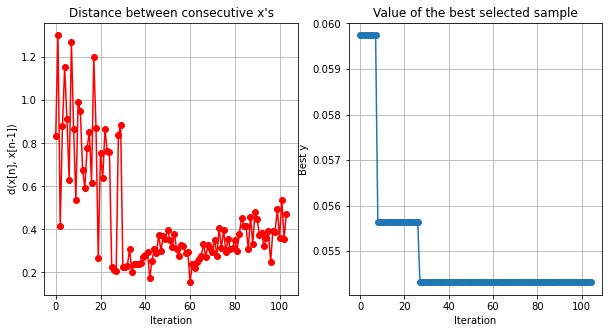

In [13]:
myOpt.plot_convergence()

In [14]:
print(myOpt.x_opt)

[0.16292225 0.30170917 0.21546576 0.58921393 0.40129363 0.83353825
 0.07856203 0.0600026  0.03166818 0.06651869 0.07999416 0.05417653
 0.03092299 0.06185743 0.06810384 0.03413081 0.02237345 0.06160137
 0.02687316 0.015621   0.08186045 0.06371884 0.00526153 0.06728162
 0.04658688 0.02636706 0.03792195 0.05354325 0.09170063 0.03572953
 0.02178994]


In [15]:
opt_beam, EI, mass, min_l= do_beam(myOpt.x_opt, n)
print(EI)
print(mass)
print(min_l)

...Adding spring stiffness terms to global stiffness matrix
...Adding member stiffness terms to global stiffness matrix
...Adding quadrilateral stiffness terms to global stiffness matrix
...Adding plate stiffness terms to global stiffness matrix
...Calculating reactions
2174409.2511360776
0.054316431539578575
0.4049661438566192


In [17]:
Visualization.RenderModel(opt_beam.struct, deformed_shape=True, deformed_scale=1, text_height=0.05)

vtkPolyData (0x7fab7ff4ed80)
  Debug: Off
  Modified Time: 79104
  Reference Count: 3
  Registered Events: (none)
  Information: 0x7fab7ff4ef00
  Data Released: False
  Global Release Data: Off
  UpdateTime: 0
  Field Data:
    Debug: Off
    Modified Time: 79093
    Reference Count: 1
    Registered Events: (none)
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
  Number Of Points: 0
  Number Of Cells: 0
  Cell Data:
    Debug: Off
    Modified Time: 79096
    Reference Count: 1
    Registered Events: 
      Registered Observers:
        vtkObserver (0x7fab7ff4f430)
          Event: 33
          EventName: ModifiedEvent
          Command: 0x7fab7ff4f100
          Priority: 0
          Tag: 1
    Number Of Arrays: 0
    Number Of Components: 0
    Number Of Tuples: 0
    Copy Tuple Flags: ( 1 1 1 1 1 0 1 1 1 1 1 )
    Interpolate Flags: ( 1 1 1 1 1 0 0 1 1 1 1 )
    Pass Through Flags: ( 1 1 1 1 1 1 1 1 1 1 1 )
    Scalars: (none)
    Vectors: (none)
    Norm

Alternatively, for low fidelity model, do calculation based on only one unit cell

In [ ]:
def f_lf_n(X, n, EI_req = 1*10**6):
    """
    function for n extra non basic nodes, beam model, unit cell model
    X[0:3*n] are node locations (x, y, z for each node)
    X[3*n:] are member diameters (8+n*8+n*(n-1)/2)
    EI_req is required EI
    """
    
    beam = test_struct(num_units=1)
    node_locs = np.array(X[0:3*n]).reshape(n, 3)
    beam.make_nodes(node_locs)
    beam.make_mem_ps(X[3*n:])
    beam.make_struct()
    beam.record_member_info()
    mass = beam.get_mass()
    min_l = beam.get_min_l()
    EI = beam.get_EI(100)

    if np.isnan(EI) or min_l<0.01:
        return(10**9)
    else:
        return(mass+10**7*max(1/EI-1/EI_req, 0))